# 03. Results Analysis & Visualization

**Objective:** Analyze the performance metrics generated by the pipeline (`model_performance_tuned.csv`).
We will compare the 4 strategies: **Baseline**, **Ratio**, **Threshold**, and **Statistical**.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional visual style for all plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)  # Use a slightly wider format for comparisons

print("Setup Complete. Libraries loaded.")

Setup Complete. Libraries loaded.


In [2]:
# Define the path to our NEW tuned results artifact
results_path = os.path.join("..", "results", "model_performance_tuned.csv")

# Load the data
try:
    df_results = pd.read_csv(results_path)
    print(f"Successfully loaded results artifact with shape: {df_results.shape}")
except FileNotFoundError:
    print(f"ERROR: File not found at {results_path}")
    assert False, "Please run the 'modeling_pipeline_tuned.py' script first."

# --- Validate the structure ---
print("\n--- First 5 Rows of Results ---")
display(df_results.head())

print(f"\nUnique Datasets: {df_results['dataset'].unique().tolist()}")
print(f"Unique Models:   {df_results['model'].unique().tolist()}")

Successfully loaded results artifact with shape: (120, 9)

--- First 5 Rows of Results ---


,dataset,model,run_id,accuracy,precision,recall,f1,roc_auc,best_params
0,baseline,LogisticRegression,1,0.726872,0.731343,0.948387,0.825843,0.593952,"{'C': 0.01, 'class_weight': None, 'solver': 'l..."
1,baseline,LogisticRegression,2,0.775330,0.765306,0.967742,0.854701,0.703763,"{'C': 0.01, 'class_weight': None, 'solver': 'l..."
2,baseline,LogisticRegression,3,0.740088,0.737624,0.961290,0.834734,0.637366,"{'C': 0.01, 'class_weight': None, 'solver': 'l..."
3,baseline,LogisticRegression,4,0.740088,0.733010,0.974194,0.836565,0.635663,"{'C': 0.01, 'class_weight': None, 'solver': 'l..."
4,baseline,LogisticRegression,5,0.740088,0.747423,0.935484,0.830946,0.646326,"{'C': 0.01, 'class_weight': None, 'solver': 'l..."



Unique Datasets: ['baseline', 'ratio', 'threshold', 'statistical']
Unique Models:   ['LogisticRegression', 'KNN', 'RandomForest']


In [3]:
# Group by dataset and model, then calculate mean/std
summary_stats = df_results.groupby(["dataset", "model"]).agg(
    {
        "recall": ["mean", "std", "max"],  # Added MAX to see the peak performance
        "f1": ["mean", "std"],
        "accuracy": ["mean", "std"],
        "precision": ["mean", "std"],
        "roc_auc": ["mean", "std"],
    }
)

# Format for readability
summary_stats = summary_stats.round(4)  # Round to 4 decimal places
print("--- Aggregated Performance Metrics (Mean ± Std. Dev. over 10 runs) ---")
display(summary_stats)

--- Aggregated Performance Metrics (Mean ± Std. Dev. over 10 runs) ---


recall                      f1          \
                                  mean     std     max    mean     std   
dataset     model                                                        
baseline    KNN                 0.9329  0.0218  0.9742  0.8310  0.0124   
            LogisticRegression  0.9594  0.0146  0.9871  0.8352  0.0078   
            RandomForest        0.9477  0.0200  0.9677  0.8435  0.0124   
ratio       KNN                 0.9406  0.0250  0.9806  0.8374  0.0137   
            LogisticRegression  0.9587  0.0150  0.9871  0.8346  0.0074   
            RandomForest        0.9542  0.0207  0.9806  0.8458  0.0105   
statistical KNN                 0.9445  0.0195  0.9871  0.8375  0.0107   
            LogisticRegression  0.9639  0.0146  0.9935  0.8384  0.0072   
            RandomForest        0.9497  0.0194  0.9742  0.8450  0.0121   
threshold   KNN                 0.9394  0.0301  0.9871  0.8364  0.0159   
            LogisticRegression  0.9568  0.0152  0.9742  0.8348  0.0085   
            RandomForest        0.9497  0.0184  0.9677  0.8462  0.0099   

                               accuracy         precision         roc_auc  \
                                   mean     std      mean     std    mean   
dataset     model                                                           
baseline    KNN                  0.7410  0.0182    0.7493  0.0116  0.6846   
            LogisticRegression   0.7414  0.0128    0.7396  0.0105  0.6330   
            RandomForest         0.7599  0.0184    0.7600  0.0115  0.6602   
ratio       KNN                  0.7507  0.0196    0.7548  0.0121  0.6855   
            LogisticRegression   0.7405  0.0118    0.7391  0.0094  0.6324   
            RandomForest         0.7626  0.0149    0.7597  0.0089  0.6652   
statistical KNN                  0.7498  0.0151    0.7523  0.0075  0.6615   
            LogisticRegression   0.7463  0.0112    0.7419  0.0081  0.6322   
            RandomForest         0.7621  0.0177    0.7612  0.0108  0.6600   
threshold   KNN                  0.7493  0.0215    0.7540  0.0095  0.6705   
            LogisticRegression   0.7414  0.0131    0.7405  0.0092  0.6312   
            RandomForest         0.7643  0.0153    0.7633  0.0124  0.6653   

                                        
                                   std  
dataset     model                       
baseline    KNN                 0.0270  
            LogisticRegression  0.0336  
            RandomForest        0.0396  
ratio       KNN                 0.0243  
            LogisticRegression  0.0344  
            RandomForest        0.0334  
statistical KNN                 0.0291  
            LogisticRegression  0.0357  
            RandomForest        0.0397  
threshold   KNN                 0.0338  
            LogisticRegression  0.0360  
            RandomForest        0.0353

In [4]:
# --- DEFINE ORDER ---
# This ensures charts always show: Baseline -> Ratio -> Threshold -> Statistical
logical_order = ["baseline", "ratio", "threshold", "statistical"]

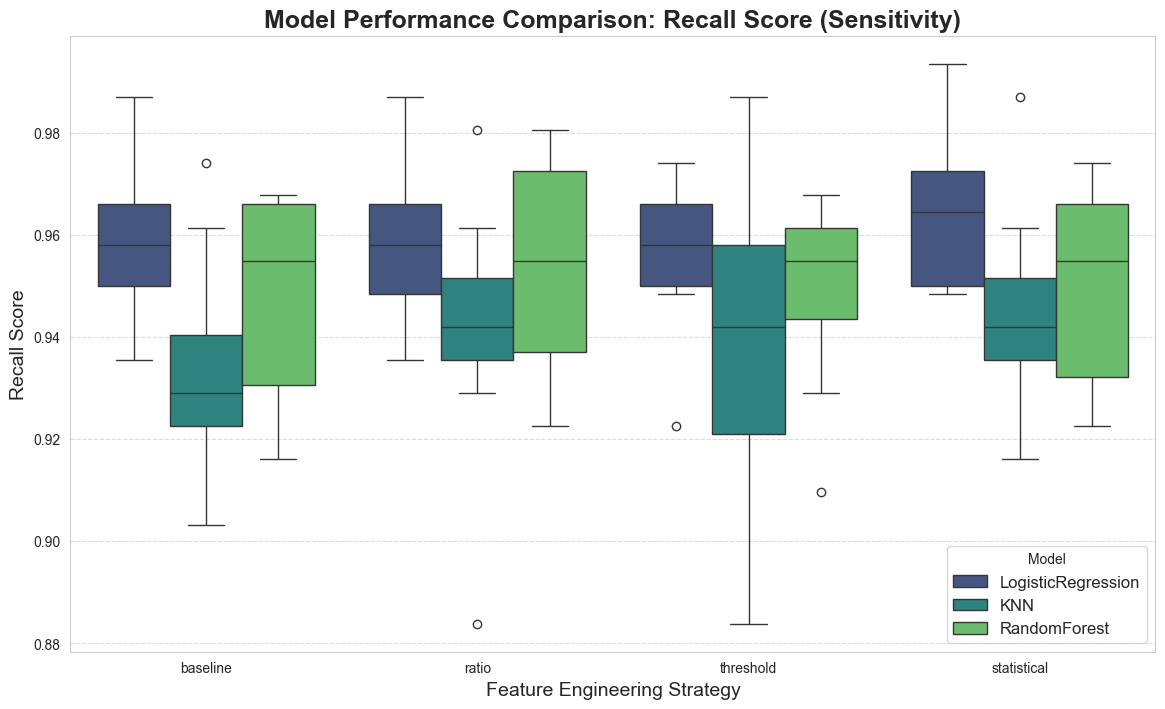

In [5]:
# --- Visualization 1: Recall Comparison (Box Plot) ---
plt.figure()
sns.boxplot(
    data=df_results,
    x="dataset",
    y="recall",
    hue="model",
    order=logical_order,
    palette="viridis",
)  # Enforce a logical order
plt.title(
    "Model Performance Comparison: Recall Score (Sensitivity)",
    fontsize=18,
    weight="bold",
)
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("Recall Score", fontsize=14)
plt.legend(title="Model", fontsize=12, loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

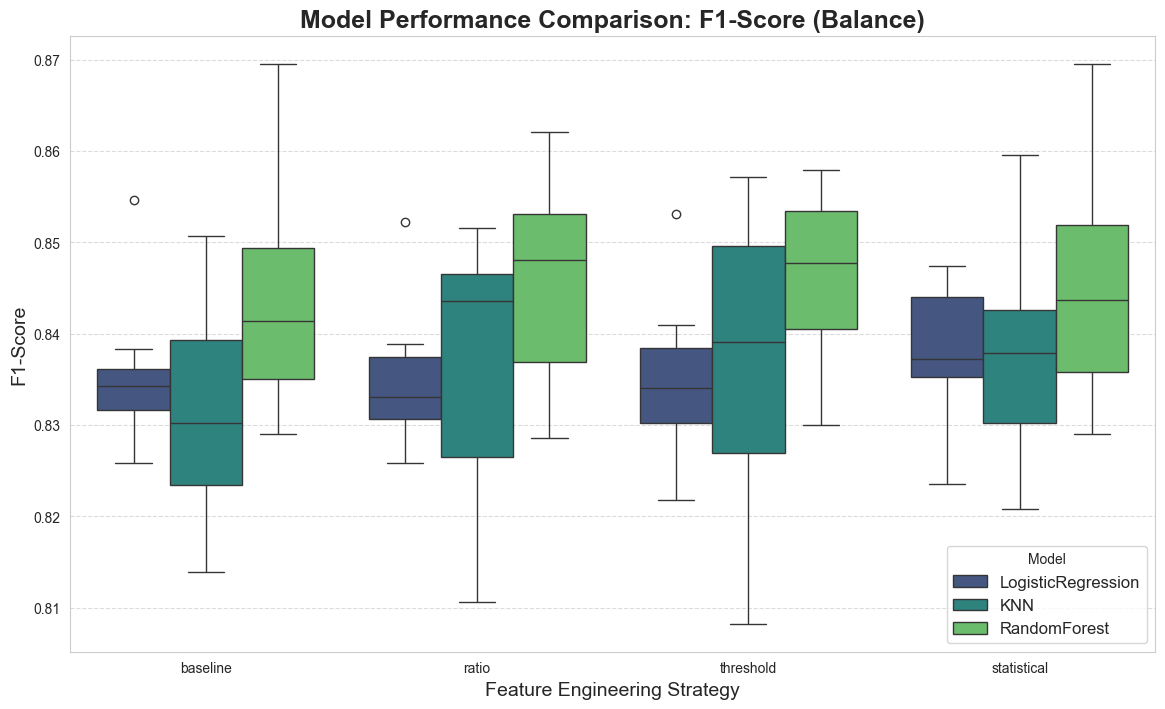

In [6]:
# --- Visualization 2: F1-Score Comparison (Box Plot) ---
plt.figure()
sns.boxplot(
    data=df_results,
    x="dataset",
    y="f1",
    hue="model",
    order=logical_order,
    palette="viridis",
)  # Enforce a logical order
plt.title(
    "Model Performance Comparison: F1-Score (Balance)", fontsize=18, weight="bold"
)
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.legend(title="Model", fontsize=12, loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [7]:
# --- IDENTIFY BEST-PERFORMING MODEL
# Find the single best combination based on Mean F1 (since Recall is saturated)
best_combination = summary_stats["f1"]["mean"].idxmax()
best_performance = summary_stats.loc[best_combination]

print("--- Conclusion ---")
print(
    f"The best performing combination based on Mean F1 is: {best_combination[1]} on the '{best_combination[0]}' dataset."
)
print("\nPerformance of the winning model:")
print(best_performance)

--- Conclusion ---
The best performing combination based on Mean F1 is: RandomForest on the 'threshold' dataset.

Performance of the winning model:
recall     mean    0.9497
           std     0.0184
           max     0.9677
f1         mean    0.8462
           std     0.0099
accuracy   mean    0.7643
           std     0.0153
precision  mean    0.7633
           std     0.0124
roc_auc    mean    0.6653
           std     0.0353
Name: (threshold, RandomForest), dtype: float64


## --- Visualization 3: Champion Model Deep Dive ---

Focusing on **Logistic Regression** to show the specific impact of strategies.



Displaying Bar Chart...


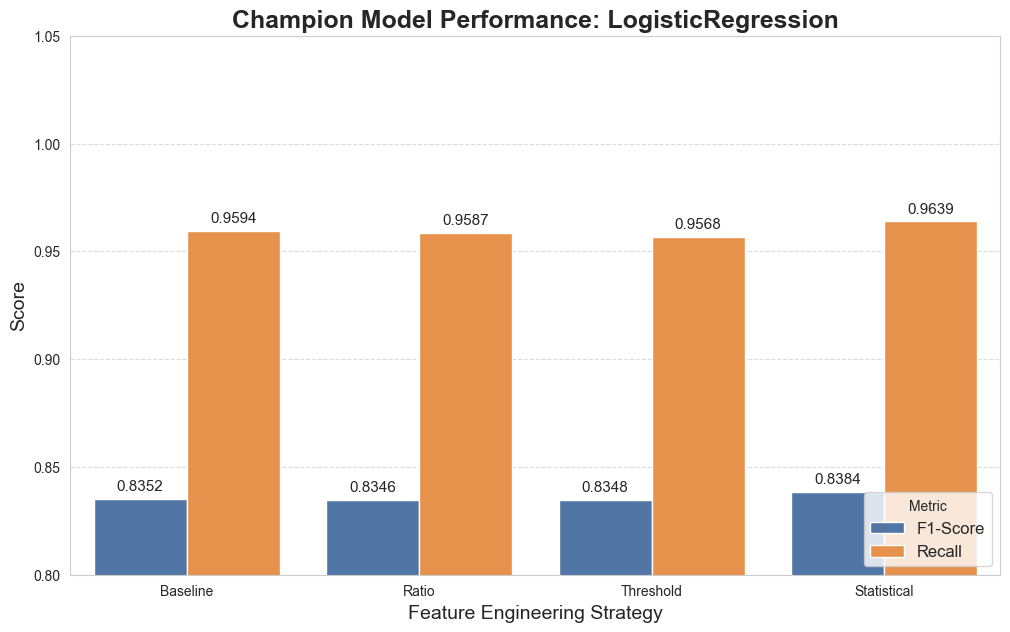

In [8]:
champion_model_name = "LogisticRegression"
df_champion = df_results[df_results["model"] == champion_model_name].copy()

# Enforce categorical order
df_champion["dataset"] = pd.Categorical(
    df_champion["dataset"], categories=logical_order, ordered=True
)

# Melt for Bar Chart
df_champion_melted = df_champion.melt(
    id_vars=["dataset"],
    value_vars=["f1", "recall"],
    var_name="Metric",
    value_name="Score",
)

df_champion_melted["Metric"] = df_champion_melted["Metric"].replace(
    {"f1": "F1-Score", "recall": "Recall"}
)

# Plot Bar Chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df_champion_melted,
    x="dataset",
    y="Score",
    hue="Metric",
    palette={"Recall": "#FF8F33", "F1-Score": "#4374B3"},
    order=logical_order,
    errorbar=None,  # Remove error bars for cleaner look on mean
)

# Annotate Bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f"{p.get_height():.4f}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
            fontsize=11,
        )

plt.title(
    f"Champion Model Performance: {champion_model_name}",
    fontsize=18,
    weight="bold",
)
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.ylim(0.8, 1.05)  # Zoom in to show differences
plt.xticks(ticks=[0, 1, 2, 3], labels=["Baseline", "Ratio", "Threshold", "Statistical"])
plt.legend(title="Metric", fontsize=12, loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

print("\nDisplaying Bar Chart...")
plt.show()

C:\Users\johnl\AppData\Local\Temp\ipykernel_18500\206926019.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_recall_stats = df_champion.groupby("dataset")['recall'].max()



Displaying Peak Recall Chart...


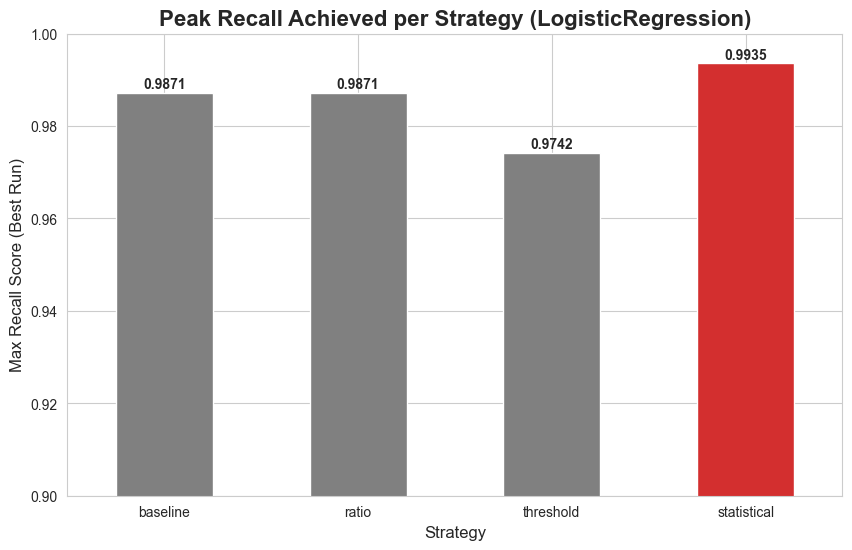

In [9]:
# --- Visualization 4: The "Peak Performance" Evidence ---
# Show the MAXIMUM Recall achieved by each strategy (to prove Statistical hit 99.4%)

max_recall_stats = df_champion.groupby("dataset")['recall'].max()

plt.figure(figsize=(10, 6))
colors = ['grey', 'grey', 'grey', '#D32F2F'] # Highlight Statistical in Red

ax = max_recall_stats.plot(kind='bar', color=colors, rot=0)

plt.title(f"Peak Recall Achieved per Strategy ({champion_model_name})", fontsize=16, weight="bold")
plt.ylabel("Max Recall Score (Best Run)", fontsize=12)
plt.xlabel("Strategy", fontsize=12)
plt.ylim(0.90, 1.0) # Zoom extreme close

# Annotate
for i, v in enumerate(max_recall_stats):
    ax.text(i, v + 0.001, f"{v:.4f}", ha='center', fontweight='bold')

print("\nDisplaying Peak Recall Chart...")
plt.show()